In [5]:
from mne_bids import BIDSPath, write_raw_bids, get_anonymization_daysback
import random
import numpy as np
import itertools
import mne
import os
import sys
import re
from bids import BIDSLayout
from util.io.iter_raw_paths import iter_raw_paths


def read_epochs(sub, desc):
    '''
    reads and concatenates epochs across runs
    '''
    layout = BIDSLayout(BIDS_ROOT, derivatives = True)
    run = lambda f: int(re.findall('run-(\w+)_', f)[0])
    fnames = layout.get(
        return_type = 'filename',
        subject = sub, 
        desc = desc
        )
    print(fnames)
    fnames.sort(key = run)
    epochs_all = [mne.read_epochs(f) for f in fnames]
    epochs = mne.concatenate_epochs(epochs_all)
    epochs = epochs.pick('eeg')
    return epochs

def plot_aux(tone_freq, epochs, sub, FIGS_DIR, aux):
    print(f"---------- Tag {tone_freq}: Audio: {aux} ----------")
    plt = epochs.plot_psd(picks = aux, fmin = 100, fmax = 300) # thought this was left
#     figname = f'{FIGS_DIR}/sub-{sub}_tone-{tone_freq}.png'
#     print(f"saving to {figname}")
#     plt.savefig(figname)


In [14]:
RAW_DIR = '../data/raw/'

for (fname, sub, task, run) in iter_raw_paths(RAW_DIR):
    raw = mne.io.read_raw_brainvision(RAW_DIR + fname)
    break

pta_sub-37.vhdr
Extracting parameters from ../data/raw/pta_sub-37.vhdr...
Setting channel info structure...


Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 31', 'Stimulus/S 32', 'Stimulus/S 33']
Not setting metadata
4099 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Loading data for 4099 events and 3001 original time points ...
1 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_15602/4075770511.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd()


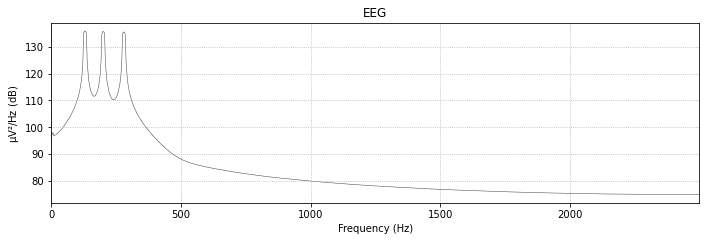

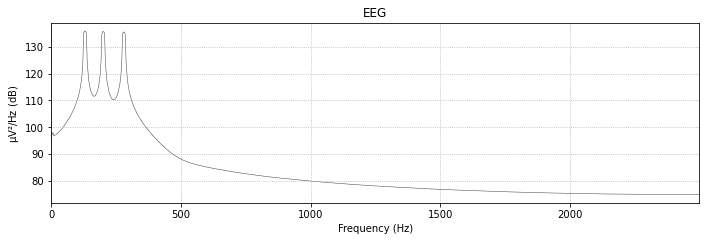

In [19]:
events, event_ids = mne.events_from_annotations(raw)
epochs = mne.Epochs(raw, events, picks = 'Aux1', tmin = -0.3, tmax = .3, baseline = (-0.3, 0))
epochs.plot_psd()